In [5]:
import os
import cv2
import numpy as np
import albumentations as A
from tensorflow.keras.preprocessing.image import img_to_array

# Paths
data_dir = "E:/Abroad period research/new idea implementation codes/Second part of the paper/justchest_Unet_Segmented_Dataset\Viral Pneumonia"
save_dir = "E:/Abroad period research/new idea implementation codes/Second part of the paper/justchest_Unet_Segmented_Dataset\Viral Pneumonia_Augmented"

# Make sure the directory exists
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Albumentations transformations for augmentation
transform = A.Compose([
    A.Rotate(limit=5, p=1),            # Mild rotation
    A.HorizontalFlip(p=0.5),           # Horizontal flipping
    A.VerticalFlip(p=0.5),             # Vertical flipping
    A.RandomBrightnessContrast(p=0.5), # Random brightness and contrast
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=5, p=1),
    A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.5),
    A.RandomFog(p=0.2),                # Add fog effect randomly
])

# Process each file
files = [f for f in os.listdir(data_dir) if f.endswith('.jpg') or f.endswith('.png')]
print(f"Number of original images: {len(files)}")

desired_count = 10192  # Update to generate 10,192 images
augment_per_image = desired_count // len(files)
extra_augments = desired_count % len(files)

for index, file in enumerate(files):
    img_path = os.path.join(data_dir, file)
    img = cv2.imread(img_path)

    num_augments = augment_per_image + (1 if index < extra_augments else 0)
    print(f"Processing {file} - Augmentations: {num_augments}")

    count = 0
    while count < num_augments:
        augmented_img = transform(image=img)['image']
        augmented_img = cv2.cvtColor(augmented_img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        # Save augmented image
        aug_filename = f"aug_{index}_{count}.png"
        cv2.imwrite(os.path.join(save_dir, aug_filename), augmented_img)

        count += 1

print(f"Total images after augmentation: {desired_count}")


<>:8: SyntaxWarning: invalid escape sequence '\V'
<>:9: SyntaxWarning: invalid escape sequence '\V'
<>:8: SyntaxWarning: invalid escape sequence '\V'
<>:9: SyntaxWarning: invalid escape sequence '\V'
C:\Users\hp\AppData\Local\Temp\ipykernel_80920\2473772154.py:8: SyntaxWarning: invalid escape sequence '\V'
  data_dir = "E:/Abroad period research/new idea implementation codes/Second part of the paper/justchest_Unet_Segmented_Dataset\Viral Pneumonia"
C:\Users\hp\AppData\Local\Temp\ipykernel_80920\2473772154.py:9: SyntaxWarning: invalid escape sequence '\V'
  save_dir = "E:/Abroad period research/new idea implementation codes/Second part of the paper/justchest_Unet_Segmented_Dataset\Viral Pneumonia_Augmented"


Number of original images: 1345
Processing Viral Pneumonia-1.png - Augmentations: 8
Processing Viral Pneumonia-10.png - Augmentations: 8
Processing Viral Pneumonia-100.png - Augmentations: 8
Processing Viral Pneumonia-1000.png - Augmentations: 8
Processing Viral Pneumonia-1001.png - Augmentations: 8
Processing Viral Pneumonia-1002.png - Augmentations: 8
Processing Viral Pneumonia-1003.png - Augmentations: 8
Processing Viral Pneumonia-1004.png - Augmentations: 8
Processing Viral Pneumonia-1005.png - Augmentations: 8
Processing Viral Pneumonia-1006.png - Augmentations: 8
Processing Viral Pneumonia-1007.png - Augmentations: 8
Processing Viral Pneumonia-1008.png - Augmentations: 8
Processing Viral Pneumonia-1009.png - Augmentations: 8
Processing Viral Pneumonia-101.png - Augmentations: 8
Processing Viral Pneumonia-1010.png - Augmentations: 8
Processing Viral Pneumonia-1011.png - Augmentations: 8
Processing Viral Pneumonia-1012.png - Augmentations: 8
Processing Viral Pneumonia-1013.png - Au

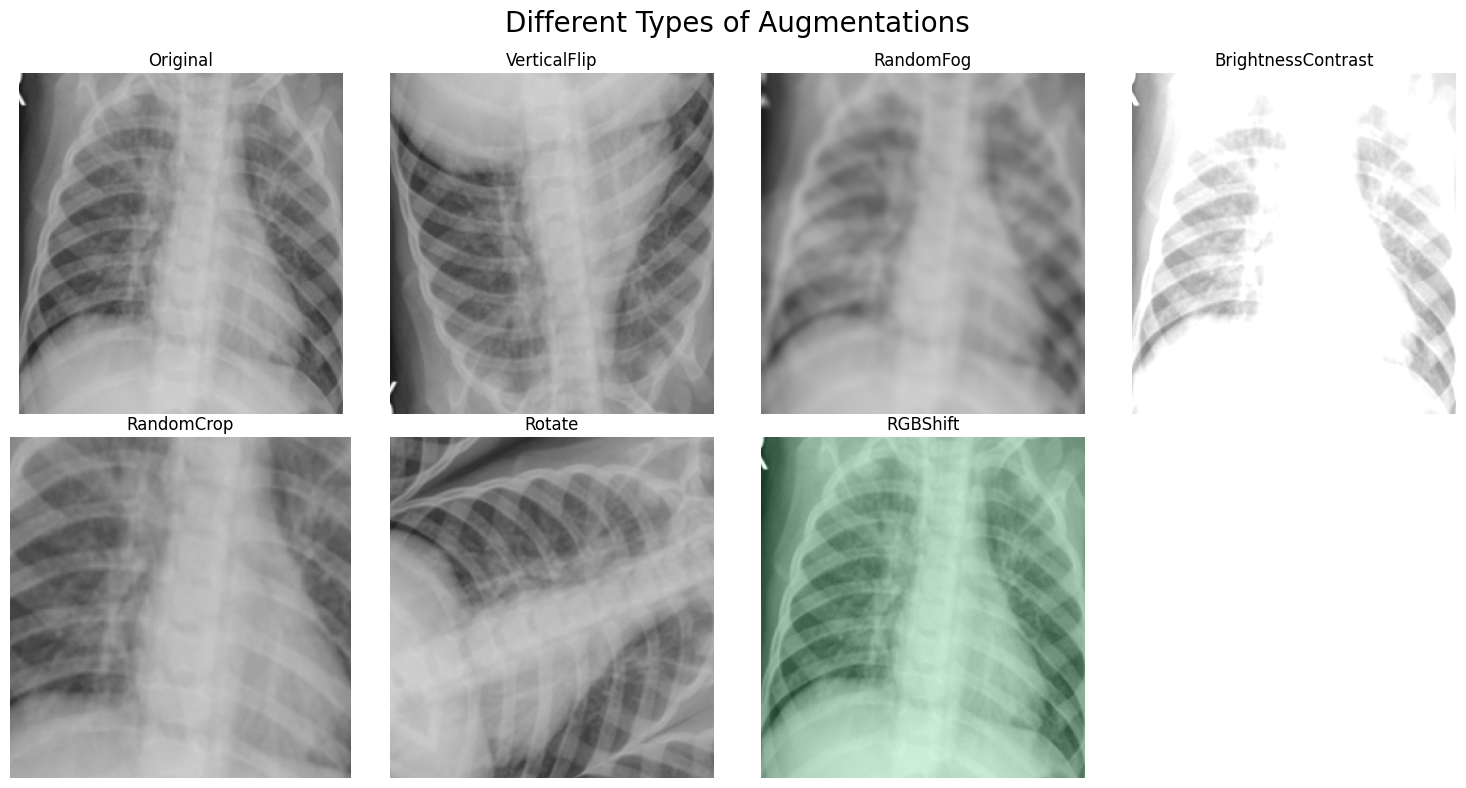

In [6]:
import os
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

# Function to plot multiple images
def plot_multiple_img(img_list, title_list, ncols, main_title):
    nrows = len(img_list) // ncols + (len(img_list) % ncols > 0)
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 8))
    fig.suptitle(main_title, fontsize=20)
    
    for i, (img, title) in enumerate(zip(img_list, title_list)):
        ax = axs[i // ncols, i % ncols]
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title, fontsize=12)
        ax.axis('off')

    for i in range(len(img_list), nrows * ncols):
        fig.delaxes(axs.flatten()[i])
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Paths
data_dir = "E:/PhD course work/Second year/new idea implementation codes/fullgrad-saliency-master/fullgrad-saliency-master/dataset/imagenet/Viral Pneumonia"
image_file = "Viral Pneumonia-1.png"  # Replace with the name of the image you want to visualize

img_path = os.path.join(data_dir, image_file)
chosen_image = cv2.imread(img_path)

# Albumentations transformations list for augmentation
albumentation_list = [
    A.VerticalFlip(p=1), 
    A.RandomFog(p=1),
    A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=1), 
    A.RandomCrop(height=220, width=220, p=1),
    A.Rotate(limit=90, p=1), 
    A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=1)
]

# Apply augmentations
img_matrix_list = []
for aug_type in albumentation_list:
    augmented_img = aug_type(image=chosen_image)['image']
    img_matrix_list.append(augmented_img)

# Insert original image at the start
img_matrix_list.insert(0, chosen_image)

# Titles of the images
titles_list = ["Original", "VerticalFlip", "RandomFog", "BrightnessContrast", "RandomCrop", "Rotate", "RGBShift"]

# Plot the images
plot_multiple_img(img_matrix_list, titles_list, ncols=4, main_title="Different Types of Augmentations")
